 Heading    

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from collections import defaultdict
from PIL import Image

import warnings
warnings.filterwarnings("ignore")


In [4]:
#Read in label class file for see classes of signs.
path = r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_4\P4_Project\labels.csv'
df = pd.read_csv(path)

In [5]:
#Visually inspect the classes and see what type of images I am working with.
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [13]:
#Setting "dataset" variable to the path where my data images are stored
dataset = r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_4\P4_Project\traffic_Data\DATA'

### 1. What are the class distribution among the images?

In [34]:
data = []

# Loop through each folder (class ID) inside the dataset directory
for folder in os.listdir(dataset):
    # Full path to the folder
    folder_path = os.path.join(dataset, folder)
    
    # Check if it is a directory
    if os.path.isdir(folder_path):
        # Count the number of image files in the folder
        num_images = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        
        # Get the class name from the DataFrame (using the folder as the class ID)
        class_name = df['Name'][int(folder)] 
        
        # Append the class name and image count to the data list
        data.append([class_name, num_images])

# Create a DataFrame to display using seaborn
display_data = pd.DataFrame(data, columns=['Class_Name', 'num_images'])
# display_data

In [59]:
#Inspecting the data in a DF.
display_data

,Class_Name,num_images
0,Speed limit (5km/h),118
1,Speed limit (15km/h),40
2,Dont Go straight,70
3,Dont Go Left,138
4,Dont Go Left or Right,96
5,Dont Go Right,36
6,Dont overtake from Left,128
7,No Uturn,22
8,No Car,142
9,No horn,130


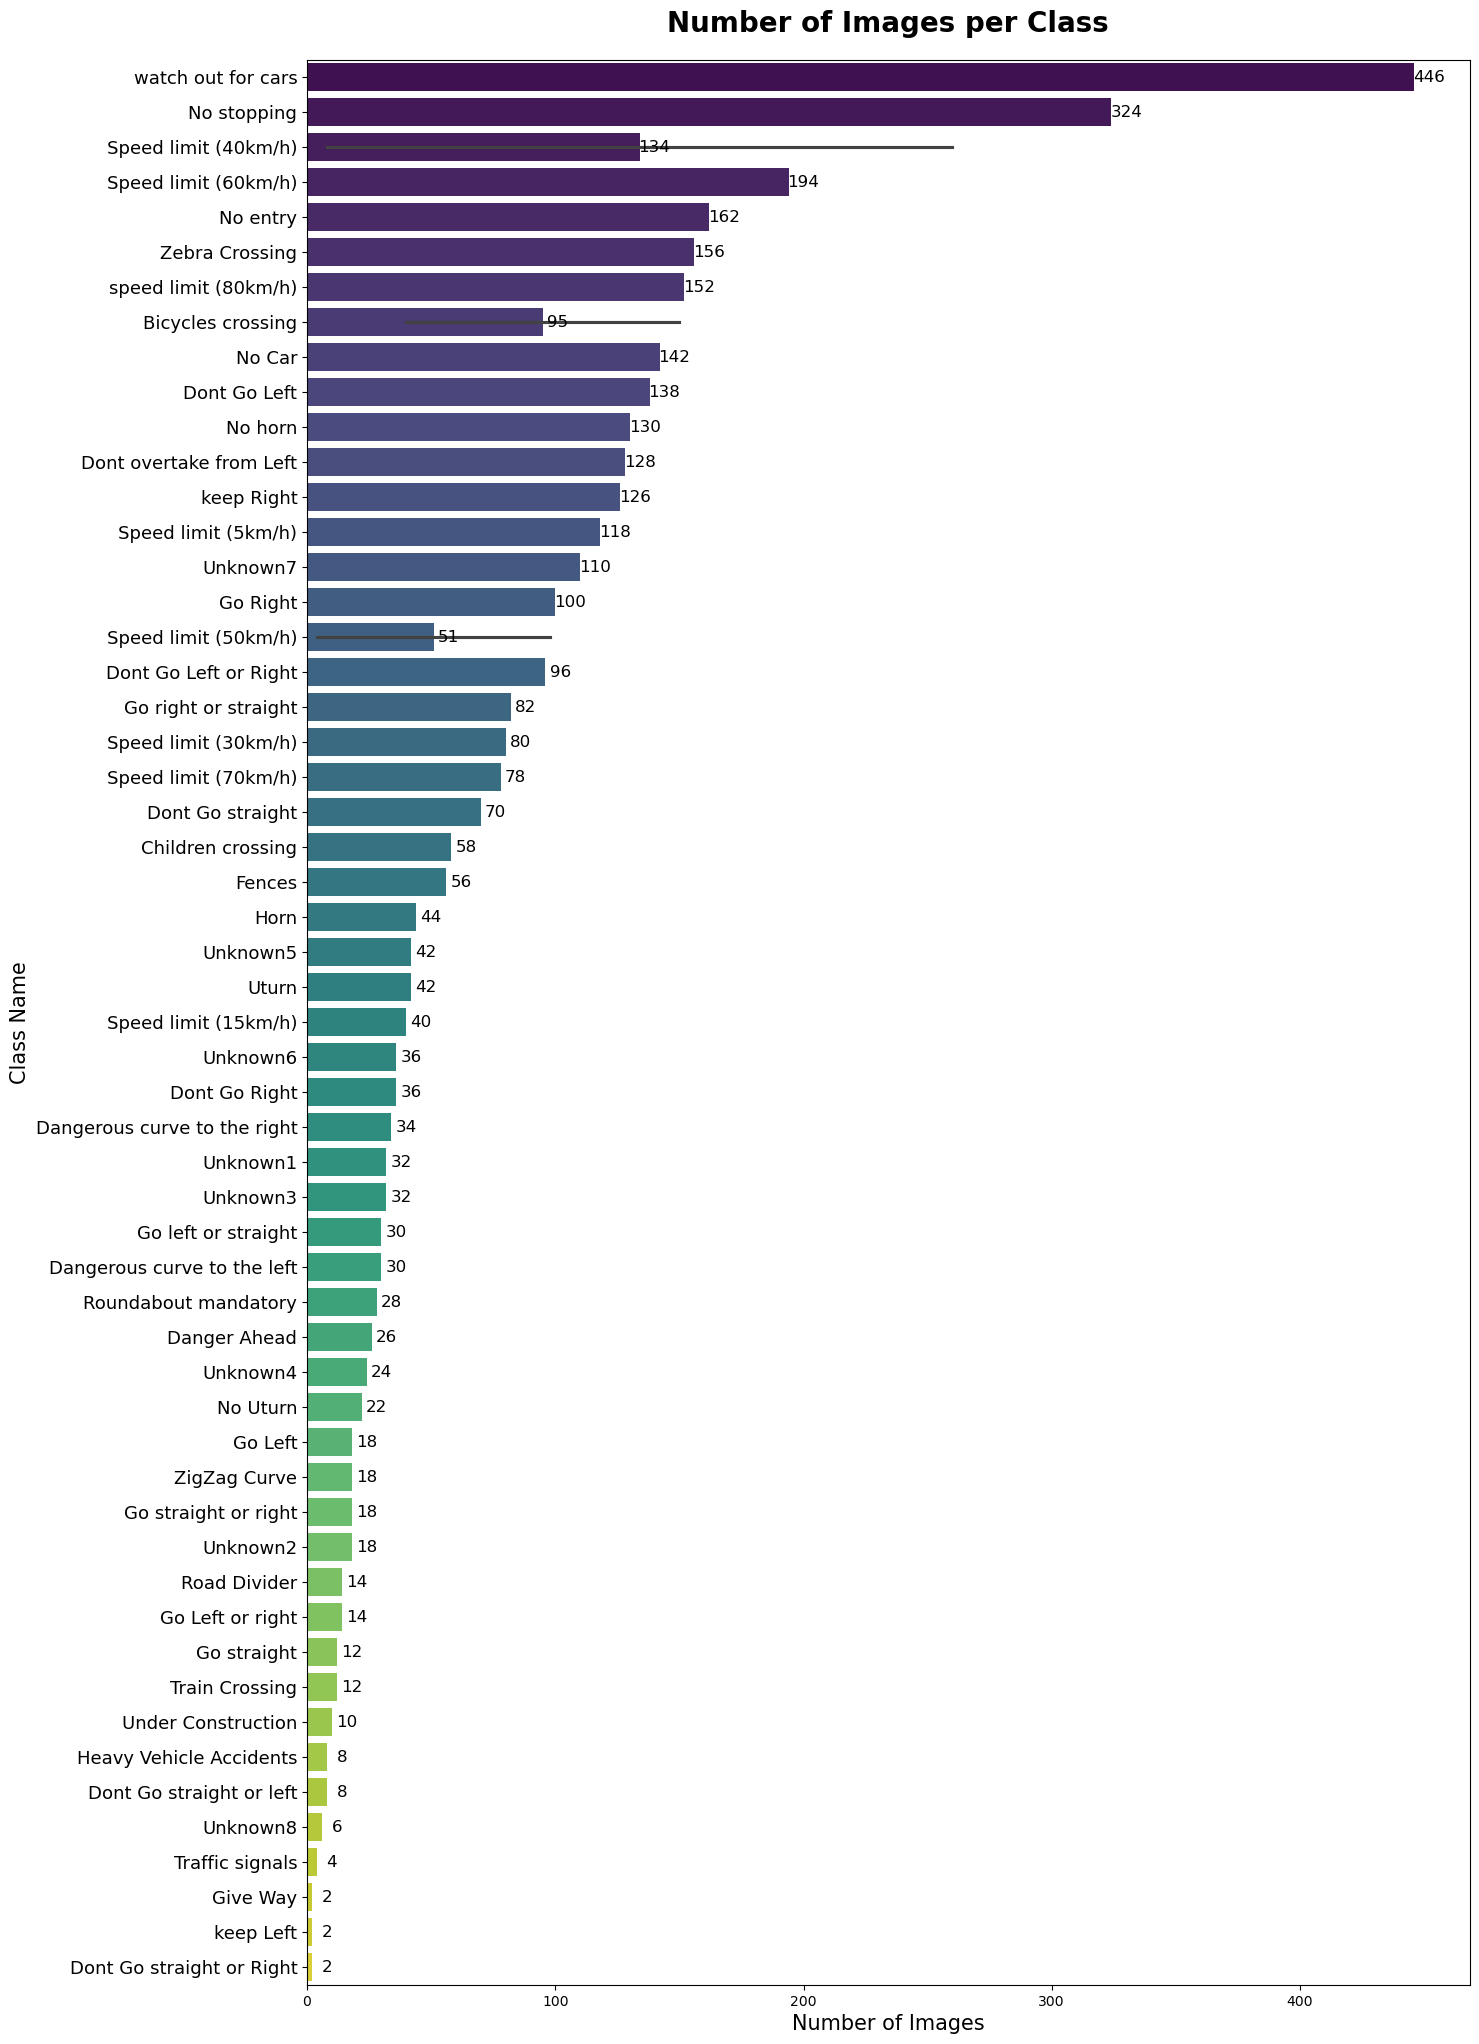

In [73]:
# Sort the data by 'num_images' for descending order
display_data_sorted = display_data.sort_values('num_images', ascending=False)

plt.figure(figsize=(15,25))
ax = sns.barplot(x='num_images',y='Class_Name' , data=display_data_sorted, palette="viridis")

# Add title and labels with custom font sizes
plt.title('Number of Images per Class', fontsize=20, weight='bold', pad=20)
plt.xlabel('Number of Images', fontsize=15)
plt.ylabel('Class Name', fontsize=15)

for p in ax.patches:
    # Get the width of the bar (which corresponds to the value)
    value = p.get_width()
    # Get the y-position of the bar (which corresponds to the category)
    y = p.get_y() + p.get_height()/2
    # Get the x-position of the bar (left edge)
    x = p.get_x() + p.get_width() + 6  

    # Add the text label
    ax.text(x, y, f'{int(value)}', ha='center', va='center', fontsize=12, color='black')


# Adjust the tick label font size
ax.tick_params(axis='y', labelsize=13)

### 2. What is the distribution of image aspect ratios?

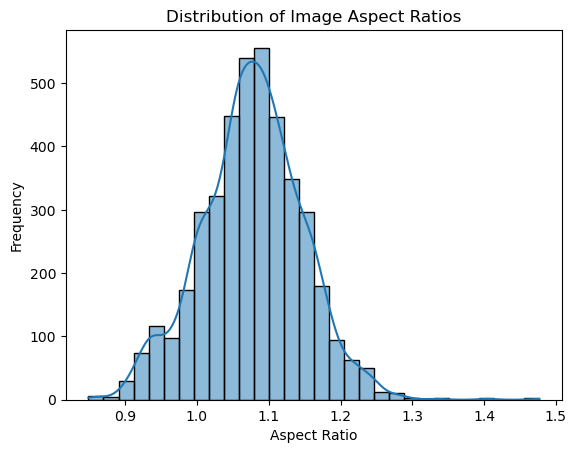

In [39]:
#Empty list to store aspect ratios
aspect_ratios = []

# Loop through each folder (class ID) inside the dataset directory
for folder in os.listdir(dataset):
    folder_path = os.path.join(dataset, folder)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            
            # Check if it's a file (image)
            if os.path.isfile(image_path):
                try:
                    # Open the image and get its dimensions
                    with Image.open(image_path) as img:
                        width, height = img.size
                        # Calculate the aspect ratio (width / height)
                        aspect_ratio = width / height
                        aspect_ratios.append(aspect_ratio)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

# Convert aspect ratios list to a DataFrame for visualization
aspect_data = pd.DataFrame(aspect_ratios, columns=['Aspect_Ratio'])

# Plot the distribution using seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(aspect_data['Aspect_Ratio'], bins=30, kde=True)
plt.title("Distribution of Image Aspect Ratios")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.show()

### 3. What are the average Red channel intensities among the images?

In [54]:
# Initialize a list to store RGB channel intensities
rgb_data = []

# Loop through each folder and image
for folder in os.listdir(dataset):
    folder_path = os.path.join(dataset, folder)
    
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            
            # Open the image
            with Image.open(image_path) as img:
                # Convert image to RGB (if not already in that mode)
                img = img.convert('RGB')
                
                # Convert image data to a NumPy array (easier to manipulate)
                img_array = np.array(img)
                
                # Calculate mean intensity for each channel (R, G, B)
                red_mean = np.mean(img_array[:, :, 0])  # Red channel
                green_mean = np.mean(img_array[:, :, 1])  # Green channel
                blue_mean = np.mean(img_array[:, :, 2])  # Blue channel
                
                # Store the results in the list
                rgb_data.append([filename, red_mean, green_mean, blue_mean])

# Create a DataFrame to display the RGB intensities
rgb_df = pd.DataFrame(rgb_data, columns=['Image_Name', 'Red_Intensity', 'Green_Intensity', 'Blue_Intensity'])

In [41]:
#Inspect the df of all the image intensities of RGB values.
rgb_df

,Image_Name,Red_Intensity,Green_Intensity,Blue_Intensity
0,000_0001.png,125.130830,102.479653,92.594683
1,000_0002.png,124.596709,96.950552,88.883765
2,000_0003.png,126.347656,103.322170,97.209529
3,000_0004.png,120.299174,92.751322,85.797934
4,000_0005.png,116.834804,89.274101,82.158333
...,...,...,...,...
4165,008_1_0002.png,128.628723,113.463298,118.633511
4166,008_1_0005_1_j.png,162.620248,146.452514,139.827531
4167,008_1_0008_1_j.png,212.634553,179.567326,179.509098
4168,009_0001.png,107.090147,95.400229,87.286831


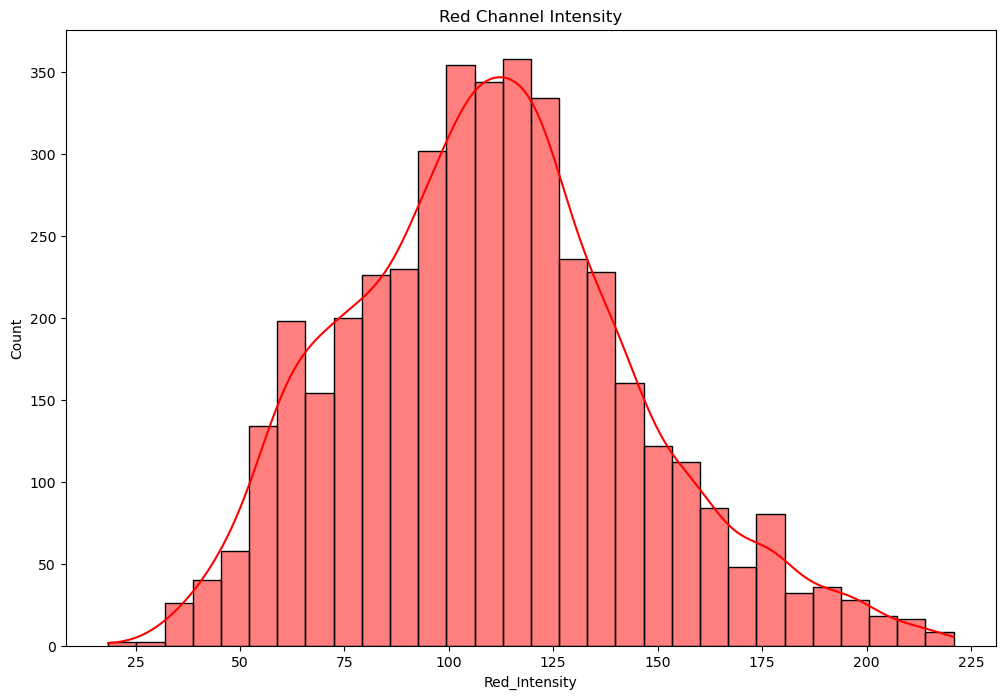

In [57]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the histogram for the Red channel
sns.histplot(rgb_df['Red_Intensity'], bins=30, color='red', kde=True)
plt.title('Red Channel Intensity');

### 4. What are the average Green channel intensities among the images?

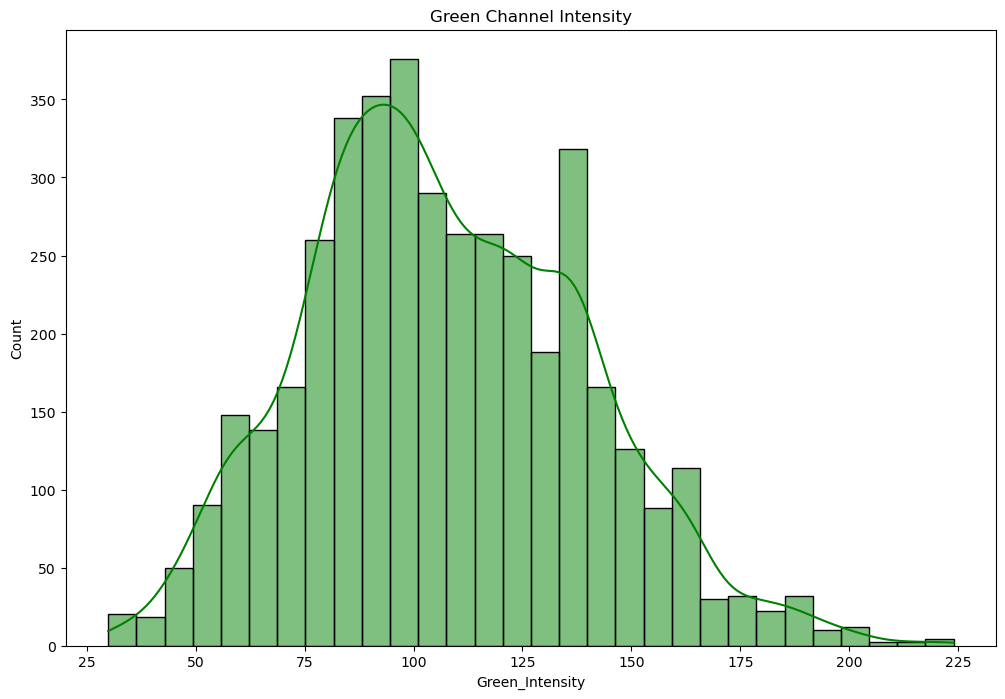

In [56]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the histogram for the Green channel
sns.histplot(rgb_df['Green_Intensity'], bins=30, color='green', kde=True)
plt.title('Green Channel Intensity');

### 5. What are the average Blue channel intensities among the images?

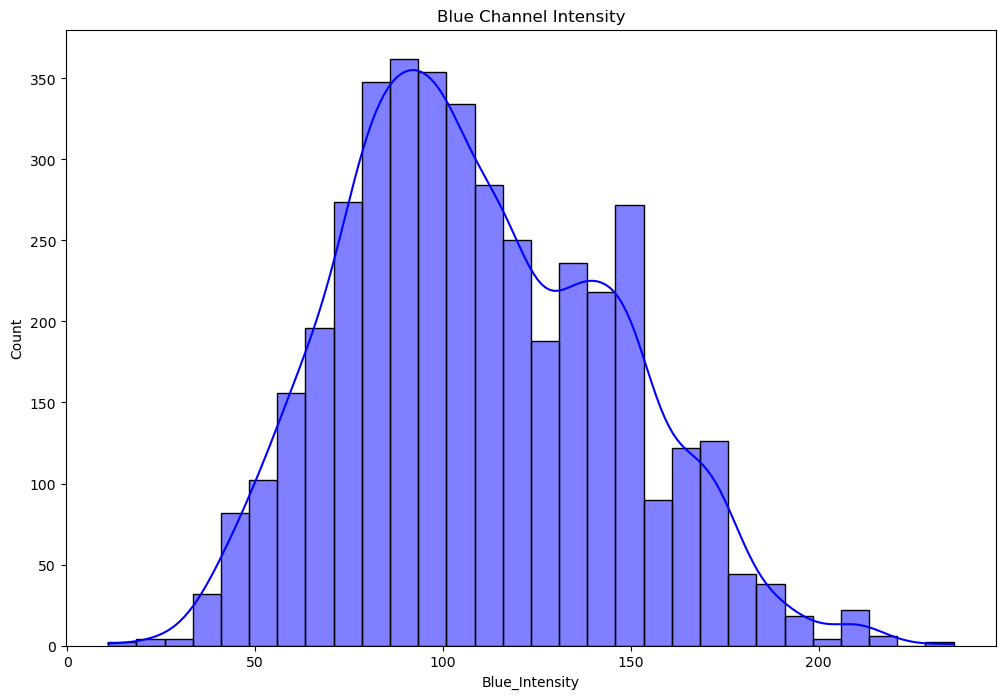

In [58]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Plot the histogram for the Blue channel
sns.histplot(rgb_df['Blue_Intensity'], bins=30, color='blue', kde=True)
plt.title('Blue Channel Intensity');

### 6. How many total Images are we working with?

In [53]:
# Make a counter to count images
total_images = 0

# Loop through each folder inside the dataset directory
for folder in os.listdir(dataset):
    folder_path = os.path.join(dataset, folder)
    
    if os.path.isdir(folder_path):
        # Count the number of image files in the folder
        num_images = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        
        # Add the count to the total
        total_images += num_images

# Output the total number of images
print(f"Total number of images: {total_images}")

Total number of images: 4170
